<br>

# Fundamentals of Data Analysis

## Project 2020 - Peter Finnerty

***

<br>

## Instructions:

<br>
In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. 

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.


2. In that notebook, an explanation of your regression and an analysis of its accuracy.


3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

<br>

***

# Contents

***

### 1. Overview of Regression Models

#### 1.1. Defining Linear Regression

#### 1.2. Simple Linear Regression

#### 1.3. Polynomial Regression

#### 1.4. Methodology of Regression

#### 1.5. Glossary of Regression Terms

***

### 2. The Powerproduction Dataset

#### 2.1. Dataset Details

#### 2.2. Distribution Plots of the Variables

***

### 3. Simple Linear Regression

#### 3.1. Using np.polyfit() on Full Dataset

* Results

#### 3.2. Simple Linear Regression Using Sklearn

* train_test_split Model for Simple Linear Regression

* Scatterlot of Training Data and Test Data With Regression

* Results of Sklearn Model of SLR

* Advanced Results of Sklearn Model of SLR

***

### 4. Polynomial Linear Regression

#### 4.1. Using curve_fit() Method on Full Dataset

* Results of curve_fit() Method

#### 4.2. Polynomial Regression Using Sklearn

* Scatterplot of Polynomial Regression of Test/Training Dat

* Results of Sklearn Polynomial Regression Model

* Advanced Results of Sklearn Polynomial Regression Model

### 5. Table of Results

***

In [124]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

<br>

# 1. Overview of Regression Concepts

## 1.1. Defining Simple Linear Regression

Algebraic Simultaneous Equations as studied in second level education, suggest that there is a linear relationship between input variables (x) and a single output variable (y) and that y can be calculation from a combination of x variables (MachineLearningMastery.com). 

At second level, Linear Regression is studied at the most basic level in the equation of a line as seen below:

<img src="https://i.pinimg.com/originals/d3/36/bd/d336bddce77d0769448561fde53b0372.jpg" style="width: 450px;">                                                                                                         

This is a useful basis from which to expand one's knowledge of Linear Regression, beyond the application in Algebra to Data Analysis and more specifically, to Simple Linear Regression on a Dataset.

In the above formula, *m* is called the angular coefficient and *c* is the intercept. When we look at a dataset, and investigate all the vectors in terms of fitting a straight line, we are searching the values of *m* and *c* that provide the most appropriate position of the line (finxter.com).

As a specific form of Regression, Simple Linear Regression deals with quantitative variables. More specifically, it is used to determine the strength of a relationship between two variables (such as rainfall and soil erosion) or, to determing the value of a dependent quantitative variable where a certain independent variable is known (scribbr.com).

The basis of Simple Linear Regression is utising the coefficients of a set of data from 2 arrays, in order to draw a straight line through the data, whereby the 'cost' is minimised. 

The cost is the combined distance of each y-vector from the Regression Line. A cost of 200, is much more desirible than a cost of 300, however, a cost of 3 is not possible.

Therefore, Simply Linear Regression is defined as the positioning of the 'best fit' straight line through though data.

The picture below exemplifies this idea:

<img src="https://miro.medium.com/max/2584/1*Nf2tTTkALYq6RTMQmhjo1A.png" style="width: 450px;">  

<br>

***

## 1.3. Defining Polynomial Regression


### What is it?

Polynomial Regression is is a type of regression analysis where the relationship between the independent variable (x) and dependent variable (y) are modelled as the *nth degree* in x.

The word Polynomial comes from the Greek word 'poly' meaning many and the Latin word 'nomial' meaning terms. Therefore, it directly translates as 'many terms'. 

This applies to Polynomial Regression, whereby, the Polynomial equations that drive the analysis models contain a number of terms.

This is demonstrated by the graph below, whereby a polynomial is presented that contains 3 terms, one cubic, one quadratic and one linear, as well as a leading coefficient and a constant.

<img src="https://slideplayer.com/slide/14484666/90/images/7/%F0%9D%9F%91%F0%9D%92%99+%F0%9D%9F%91+%E2%88%92+%F0%9D%9F%93%F0%9D%92%99+%F0%9D%9F%90+%E2%88%92%F0%9D%9F%90%F0%9D%92%99%2B%F0%9D%9F%8F+Parts+of+a+polynomial+Cubic+term+Linear+term.jpg" style="width: 450px;"> 



The models produced by Polynomial Regression are non-linear as they produce estimations that do not fit a straight line. It fits a non-linear relationship between the value of x and the corresponding conditional mean of y, denoted as *E(y|x)* (i2tutorials). 

Despite fitting a non-linear model, Polynomial Regression operates as a linear statistical estimator. 

Furthermore, Polynomial Regression is a special case of Multiple Linear Regression. Another name for Polynomial Regression is curve fitting.

<br>

***

### What Does Curve Fitting Require?

#### The Basis Function

Curve fitting first requires creating the form of the *Mapping Function*, this is known as the *Basis Function*. 

To begin with, we do not yet know the form of the Mapping function that maps examples of inputs and outputs, but we can approximate it by creating the Basis function (Machine Learning Mastery).

Once the Basis Function has been approximated, the parameters to the function can be identified that result in the least amount of error. 

By comparing the output from the Basis Function to the observed output, we can calculate the error.

When there are two variables involved in a dataset, as there is with the Powerproduction Dataset, the independent variable will form the input of the Mapping function, whilst the dependent variable will form the output.

## 1.4. Methodolgy of Regression

As previously described, this project involves two differenct types of regression: Simple Linear Regression (Section 3) and Polynomial Regression (Section 4). For each type of regression, there will be two different types of approache. 

The first approach will involve an example of bad-practice regression. This will be a non-model based approach, where the dataset is analysed in its entirety. The purpose of doing so will be to underline the basics of regression, whilst outlining how failing to split the data into training and test data can result in inaccuracies. 

The second type of regression will utilise accurate Sklearn models on training/split data. It will be a more complex, memory-consuming process, however, it will yield better results than the basic forms. 

Furthermore, it will provide for a wider range of statistics to indicate a successful regression of the data, such as Standard Error of the Coefficient (Std. Err.), which can not be created using the non-model approach.

The way in which Sklearn splits data into training and test data is illustrated in the picture below.

<img src="https://www.kdnuggets.com/wp-content/uploads/train_test_split.jpg" style="width: 450px;">

*Image from KDnuggets*

<br>

***

## 1.5. Glossary of Regression Terms

### Coefficients <span style="color: blue;">(*coef*)</span>

In the regression of a dataset, the coefficients describe the statistical relationship between the independent variables and the dependent variables.

The sign of the coefficent can tell you the direction of the relatioship between the variables. A positive sign identifies that as the independent variable increases, the mean of the dpendent variable also increases, whislt a negative sign suggests a decrease.

The value of the coefficient describes how the mean of the dependent variable changes in relation to the independent variable.

Whilst carrying out regression on an indepedent variable and a dependent variable, it is important to hold the other variables 'constant'. That is to say it is imperative to study the effect of the independent variable on each dependent variable in isolation from the others (statisticsbyjim.com).

The coefficients of the output are estimates of the actual data population, therefore, it is important to ensure that the model for regression follows best practice for that particular type of regression.

<br>

***

### Coefficient of Determination <span style="color: blue;">*(R²)*</span>

#### <span style="color: green;">*High Percentage R² = Good fit; Low Percentage R² = Bad fit*</span>

R² is the percentage of the response variable variation of a linear model. It measures how close the data are fitted by a line of regression (Frost, Statistics By Jim).

R² is a valuable indicator for a Linear-regression model (including Polynomial models), however, it is important to check the test and training data of the model for signs of unwanted bias.


***

### Standard Error of the Coefficient  <span style="color: blue;">(*SE coef.* or *Std. Err.*)</span> and t-value  <span style="color: blue;">(*t*)</span>

#### <span style="color: green;">*Std. Err: Low Values = Good fit; High Values = Bad fit*</span>

#### <span style="color: brown;">*t-value: High Values = Good fit; Low Values = Bad fit*</span>

The Standard Error measures the accuracy of the unknown coefficient of the model. It is a floating point number that is always positive. The smaller the Std. Err. the more accurate the estimate is (Minitab.com). 

Dividing the coefficient by the standard error will produce a t-value or t-statistic. As a lower Std. Err. indicates lower error and the t-value calculates how many times the error divides into the coefficent itself, a larger t-value indicates greater accuracy. 

As a result, the t-value is essentially a measure of the error in relation to the coefficient.

***

### P-Values  <span style="color: blue;">(*p*)</span>, the Null Hypothesis <span style="color: blue;">(*H0*)</span> and the Significance Level  <span style="color: blue;">(*α* or *alpha level*)</span>   

#### <span style="color: green;">*Good Fit: when p-value* < *Significance Level*, and H0 is rejected </span>

P-values work together with Coefficients to indicate to the statistical value produced in the Regression process. Specifically, the P-values *of* the coefficients identify whether the relationships observed in a sample exist throughout the population (StatisticsByJim). 

The p-value is a number between 0 and 1.

For each independent variable, there is a possibility that the variable has no correlation to the dependent variable, in which case there is not enough proof to display a relationship. This lack of a relationship is known as the Null Hypothesis and the P-values can test for this.

If it is first necessary to reject the Null Hypothesis in order to determine that there is a significant enough effect between the variables in your sample in order to conclude that the same effect is present in the wider population. The significance level is the probability of dismissing the Null Hypothesis when it in fact is evident.

The Significane Level, is a pre-determined threshold. It is normally set to a value of 0.05 (5%). However, the researcher must identify an appropriate threshold of Significance Level, from which to compare to the p-value.

If the P-value is less than the significance level, the Null Hypothesis can be sufficiently rejected. 

Contrasly, if the P-value is higher than the significance level, the Null Hypothesis cannot be rejected and there is not enough evidence to infer a relationship between the independent and dependent variable.

As the coefficients, P-values and the Significance level are determined for each variable in isolation, this can determine what variables should be included in the Regression analysis. 


<br>

***

# 2. The Powerproduction Dataset 

## 2.1. Dataset Details

In [125]:
df = pd.read_csv("powerproduction.txt")

power = df["power"]
#power = pd.DataFrame(power)

speed = df["speed"]
#speed = pd.DataFrame(speed)

### Shape

The Powerproduction dataset has 2 columns and 500 rows, as demonstrated in the cell below.

In [126]:
df.shape

(500, 2)

<br>

***

### Variables

The variables presented in the two columns are Speed and Power, with each containing 500 vectors.

In [127]:
list(df.columns)

['speed', 'power']

The Speed variable relates to wind speed that affects the rate at which a wind turbine spins.

The Power variable reflects the level of power produced at each observation of speed.

***

### Relationship Between Variables

**Independent Variable:** Speed

**Dependent Variable:** Power

It is indeed intuitive that Speed is the Independent variable and that Power is the Dependent Variable, as we know from real-world logic that the rate of wind speed affects the level of power that is produced, but the power does **not** affect the wind Speed.

By investigating the first 10 and last 15 rows of both variables, a number of key observations can be made.

In [128]:
speed.head(10), power.head(10)

(0    0.000
 1    0.125
 2    0.150
 3    0.225
 4    0.275
 5    0.325
 6    0.400
 7    0.450
 8    0.501
 9    0.526
 Name: speed, dtype: float64,
 0    0.000
 1    0.000
 2    0.000
 3    0.000
 4    0.000
 5    4.331
 6    5.186
 7    3.826
 8    1.048
 9    5.553
 Name: power, dtype: float64)

**Speed:** For almost every Speed observation, there is a consistent increase of 0.025(km/hour). There are a number if exceptions to this, such as from index 0, to index 1, which goes directly from 0.000 to 0.125.

**Power:** The Power variable, indicates that no power is produced for the first 5 observations. When Speed reaches 0.325 however, power output jumps to 4.331.

In [129]:
speed.tail(15), power.tail(15)

(485    24.249
 486    24.299
 487    24.349
 488    24.374
 489    24.399
 490    24.499
 491    24.525
 492    24.575
 493    24.650
 494    24.750
 495    24.775
 496    24.850
 497    24.875
 498    24.950
 499    25.000
 Name: speed, dtype: float64,
 485    103.700
 486     93.694
 487     93.078
 488     98.223
 489     95.117
 490      0.000
 491      0.000
 492      0.000
 493      0.000
 494      0.000
 495      0.000
 496      0.000
 497      0.000
 498      0.000
 499      0.000
 Name: power, dtype: float64)

Similarly, at the tail end of the dataset, when Speed reaches 24.499, Power drops from 95.117, to 0. 

This reflects the way that wind trubines production has a minimum and maximum wind speed required for the production of power.

<br>

***

### The Mean Value

##### Independent Variable: Speed

In [130]:
mean_speed = sum(speed / float(len(speed)))
mean_speed

12.590398000000002

As is seen above the Mean value of the 'Speed' variable is **12.59**,

##### Dependent Variable: Power

In [131]:
mean_power = sum(power) / float(len(power))
mean_power

48.014584

The Mean value of the Power variable is **48.01**.

***

### The Variance

Variance is the measure of the spread between numbers in a data set. In other words, it means how far each number in the set is from the mean (Dhiraj, K, 2020).

In [132]:
# Create function to calculate the variance
def variance(values, mean):
    return sum([(i-mean)**2 for i in values])

In [133]:
variance_speed, variance_power = variance(df["speed"], mean_speed), variance(df['power'], mean_power)
variance_speed , variance_power

(26048.04877979798, 864154.5409834714)

Variance of the Speed variable: **26048.05**.

Variance of the Power variable: **864154.54**.

***

### Covariance

Covariance is the measure of the directional relationship between two random variables. In other words, covariance measures how much two random variables vary together (Dhiraj, K, 2020).

In [134]:
# Create function to calculate covariance between Speed and Power
def covariance(speed, mean_speed, power , mean_power):
    covariance = 0.0
    for p in range(len(speed)):
           covariance = covariance + (speed[p] - mean_speed) * (power[p] - mean_power)
    return covariance

In [135]:
covariance_speed_power = covariance(df['speed'],mean_speed,df['power'],mean_power)
covariance_speed_power

128093.77177178406

Covariance between both variables: **128093.77**.

***

### The Terms of the Linear Equation: Y = mX + c

#### Y = Power (dependent variable)

#### X = Speed (independent variable)

m is the slope *or* **the covariance of Power / the variance of Speed**

In [136]:
m = covariance_speed_power/ variance_speed
m

4.917595665404674

Therefore, **m = 4.918**

c is the constant *or* **mean of Power *  mean of Speed**

In [137]:
c = mean_power - m * mean_speed
c

-13.89990263051969

Therefore, **c = -13.89**

<br>

***

## 2.2. Distribution Plots of the Variables

In order to visualise the distribution of the variables, it is necessary to plot them separately, in univariate plots.

#### Speed Distribution

Looking below at the plot of the Speed variable, there is a near-uniform distribution of Speed vectors, reflecting the consistent spread of data that was previously noted.

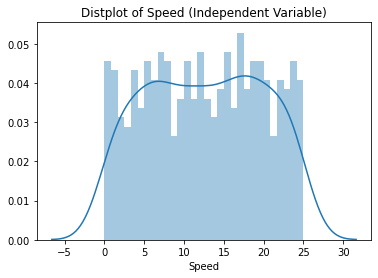

In [138]:
speed_hist = sns.distplot(speed, bins=30)
plt.xlabel("Speed")
plt.title("Distplot of Speed (Independent Variable)")
speed_hist

#### Power Distribution

The concentration of Power data around on either side of the wind speed threshold is evident in the plot below. Around 0 and 100, there are peaks of Power vectors.

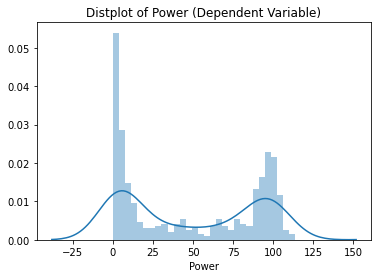

In [139]:
power_hist = sns.distplot(power, bins=30)
plt.xlabel("Power")
plt.title("Distplot of Power (Dependent Variable)")
power_hist

<br>

***

## 3. Simple Linear Regression

The following section is split up into two sections. 

Section 2.1. outlines a basic form of Simple Linear Regression using Numpy's polyfit() function. This is not true regression, however, as no model has been created, i.e. the data has not been split into test and training data to provide an accurate regression line.

Section 2.2. features the creation of a Linear Regression model using Scikit Learn. The dataset is first split into test and training data, before Simple Linear Regression is carried out and valuable data is produced in this process. 

<br>

***

## 3.1. Using np.polyfit() on the Full Dataset

In the plot below, the Speed and Power variables have been plotted in a bivariate plot.

#### Scatterplot of Speed Vs. Power

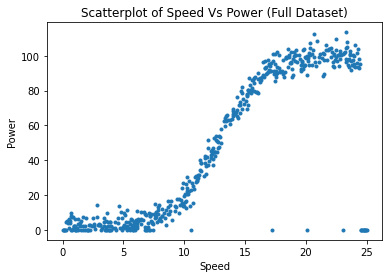

In [140]:
# Create bivariate plot of speed vs power and format
Plot_1 = plt.plot(speed, power, '.')
plt.xlabel("Speed")
plt.ylabel("Power")
plt.title("Scatterplot of Speed Vs Power (Full Dataset)")

Plot_1

Examining the above graph, a curve is noticed in the data as Speed and Power increase. 

There is a strong concentration of vectors in the bottom left: 0-8 for Speed and 0-10 for Power. 

Furthermore, there is a concentration in the top right: 17-35 for Speed and 90-110 for Power. Infact it appears from simply looking at the plot that the majority of the vectors of the dataset are located in these two zones.

In the scatterplot below, the Speed and Power data has been input into np.polyfit() and a degree of 1 has been assigned. Although polyfit() is not speciically designed for Simple Linear Regression, setting the parameter to 1 achieves this goal.

#### Scatterplot with Regression Line

[  4.91759567 -13.89990263]


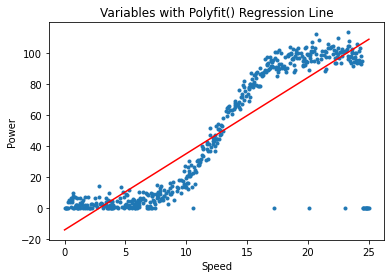

In [141]:
# Create scatterplot and fornate
Plot_2 = plt.plot(speed, power, '.')
plt.xlabel("Speed")
plt.ylabel("Power")
plt.title("Variables with Polyfit() Regression Line")

# Sub in variables into polyfit() function with a degree of 1 (for straight line)
coeffs = np.polyfit(speed, power, 1)

# Print the coefficients of the straight line to the screen
print(coeffs)

# Plot the polyfit() variable factoring in both coefficient values
plt.plot(speed, coeffs[0] * speed + coeffs[1], 'r-')

Plot_2

### Results

#### R² of polyfit() Method

In [142]:
# Use np.corrcoef to caluclate R²
np.corrcoef(speed, power)[0, 1]**2

0.7289360258564074

As previously state, accurate regression requires the splitting up of data into test data and training data. This technique does not produce accurate results and has been included to highlight the necessity of using a reliable model.

It has an R² of 72.9%.

As this is not a Regression *Model*, the data cannot be said to fit, underfit or overfit.

<br>

***

## 3.2. Carrying Out Simple Linear Regression Using Sklearn

This section displays a more accurate method of Simple Linear Regression using Scikit Learn and the train_test_split() method for dividing data into training and test data.

This will require splitting the powerproduction dataset will be split with a 75%/25% ratio of training to test data.

### train_test_split Method for Simple Linear Regression

In [143]:
# Import necessary Sklearn methods
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [144]:
df = pd.DataFrame(pd.read_csv("powerproduction.txt") )

# Reshape both columns to be 2D and name as x/y
x = df["speed"]
x = x.values.reshape(500, 1)

y = df["power"]
y = y.values

#Split the dataset into Training set and Test Set, set test_size to
# 2.5: train is 75% the size of the ful dataset and test is 25% the 
# size of full dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                    test_size= 0.25, random_state=0)

# Create model variable, set to LinearRegression() function
# Use .fit() to adust weight of x and y data
model = LinearRegression().fit(x_train, y_train)

# Use the trained model to predict tests
y_predict = model.predict(x_test)

Printing the first 3 elements from each of the train/test arrays, we can see that the data is random_state() has randomised the data:

In [145]:
x_train[0:2], y_train[0:2], x_test[0:2], y_test[0:2]

(array([[12.187],
        [ 3.078]]),
 array([45.056,  3.063]),
 array([[ 4.905],
        [12.713]]),
 array([ 7.06 , 51.149]))

***

### Scatterlot of Training Data and Test Data With Regression

Text(0, 0.5, 'Modelled Power (Dependent Variable)')

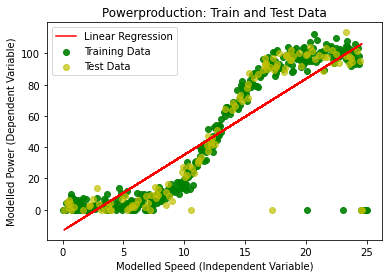

In [146]:
# Plot the y_predict line to show Sklearn Linear Regression line
plt.plot(x_test, y_predict, color='r', label="Linear Regression")

# Plot the training data and format the plot
plt.scatter(x_train, y_train, label="Training Data", color='g', 
            alpha=.9)
plt.scatter(x_test, y_test, label="Test Data", color='y', alpha=.7)
plt.legend()
plt.title("Powerproduction: Train and Test Data")
plt.xlabel("Modelled Speed (Independent Variable)")
plt.ylabel("Modelled Power (Dependent Variable)")

### Save test/train variables to separate csv files

In [147]:
x_train_1 = pd.DataFrame(x_train)
x_test_1 = pd.DataFrame(x_test)
y_train_1 = pd.DataFrame(y_train)
y_test_1 = pd.DataFrame(y_test)
y_predict_1 = pd.DataFrame(y_predict)

In [148]:
x_train_1.to_csv('1_x_train.csv')
x_test_1.to_csv('1_x_test.csv')
y_train_1.to_csv('1_y_train.csv')
y_test_1.to_csv('1_y_test.csv')
y_predict_1.to_csv('1_y_predict.csv')

### Results of Sklearn Model of SLR

#### Coefficient

The Coefficient of this model is 4.866:

In [149]:
# Print Model coefficient
coefficient_2 = model.coef_
print("Sklearn SLR Coefficient: ", coefficient_2)

Sklearn SLR Coefficient:  [4.8664947]


#### Training Data: Coefficient of Determination (R²)

The R² of the training data is 72.2%:

In [150]:
# Print R² of training data
train_r_sq_2 = model.score(x_train, y_train)
print("R² of Training Data: ", train_r_sq_2)

R² of Training Data:  0.7228817156951498


#### Test Data: Coefficient of Determination (R²)

Most importantly, the R² of the test data is 74.6% - this is the most important indicator of accuracy.

In [151]:
# Print R² of test data
test_r_sq_2 = model.score(x_test, y_test)
print("R² Test Data:        ", test_r_sq_2)

R² Test Data:         0.7464131693198832


Note: A large degree of difference in the R² of the training data and that of the test data would indicate that there is an issue with the model. As this is less than 3%, it is acceptable.

***

### Advanced Results of Sklearn Model of SLR

As we have used Sklearn to split our data and carry out Simple Linear Regression using a model, we can access extra statistics on our dataset.

Below is a bloack of code that calls on the statsmodels.api() method to produce data including Std.Err, t-values and other datapoints.

In [152]:
# import statsmodels.api and math
import statsmodels.api as sm
import math

# Load in test x array as U and load in first vector (0)
# Create an empty list for y to be populated later
U = x_test
U_0 = 0
y = []

# Create a for loop with .append() to append the logarithm of each element 
# of x_test divided by 0, Eulers number, to y
for i in U:
    y.append(math.log(i/U_0, math.e))

    # Set y to y_test
y = y_test

# Set t to y_predict and add a constant
t = y_predict
t = sm.add_constant(t, prepend=False)

# Set model to the statsmodelapi summary, factoring in y and t as parameters
model = sm.OLS(y,t)
# Create result variable and set to the model already fit
result = model.fit()
result.summary()

<ipython-input-152-d289f8a5ba99>:14: RuntimeWarning: divide by zero encountered in true_divide
  y.append(math.log(i/U_0, math.e))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     365.9
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           1.15e-38
Time:                        23:12:37   Log-Likelihood:                -556.42
No. Observations:                 125   AIC:                             1117.
Df Residuals:                     123   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0435      0.055     19.128      0.000       0.936       1.151
const         -1.0167      3.234     -0.314      0.754      -7.418       5.385
==============================================================================
Omnibus:                       94.685   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              773.358
Skew:                          -2.583   Prob(JB):                    1.17e-168
Kurtosis:                      14.036   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Note: The statistics of note below all relate to the x1 values, the constant values are being ignored in this model.

#### Std. Err.

As seen above the Standard Error of the coefficient is **0.055**.

#### t-value (t)

The t-value is x1 is **19.138**. As a high t-value is desirible, it is clear that a better model would result in a higher t-value.


#### p-value

The p-value is 0.

<br>

***

# 4. Polynomial Linear Regression


Two forms of Polynomial Regression will be carried out in this section.

The first type will once again be an inaccurate regression on the full dataset. It will involve manually creating a Basis function that will them be fed as the parameter for Numpy's curve_fit() function.

The second type will be a more accurate Sklearn regression model. The train_test_split() method will first split the data. Following this the x_train data will be fed into PolynomialFeatures() function (set to the 3rd degree). 

Finally the polynomial function will be fed into the LinearRegression() function and a prediction will be made.

***

## 4.1. Numpy's curve_fit(): Polynomial Regression on Full Dataset

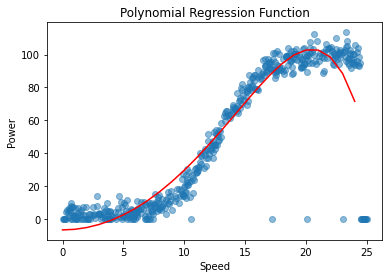

In [153]:
# define the basis function
def basis(x, a, b, c):
    return a * np.power(x, 7) + b * x**2 + c

# choose the input and output variables
x, y = df["speed"], df["power"]
# curve fit
exponents, _ = curve_fit(basis, x, y)
# summarize the parameter values
a, b, c = exponents

# plot inputs and outputs
plt.scatter(x, y, alpha=0.5)

# Use np.arange to inputs from smallest vector to largest
x_array = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_array = basis(x_array, a, b, c)
# create a line plot for the mapping function
plt.plot(x_array, y_array, color='red')
plt.title("Polynomial Regression Function")
plt.xlabel("Speed")
plt.ylabel("Power")

plt.show()

***

#### Coefficients

The basis function we created has the following form: **y = a * x + b * x^2 + c**

Below, the exponents (a, b, c) are printed to the screen.

In [154]:
exponents

array([-2.89639577e-08,  3.66538775e-01, -6.77133958e+00])

We can now factor these into the equation to determine the coefficients, or optimal parameters.

In [155]:
print('y = %.5f * x + %.5f * x^2 + %.5f'% (a, b, c))

y = -0.00000 * x + 0.36654 * x^2 + -6.77134


Coefficents = **-0.0, 0.367. -6.771**

***

#### R² of curve_fit() Method

In [156]:
# Use np.corrcoef to caluclate R²
np.corrcoef(x_array, y_array)[0, 1]**2

0.9114804570192526

The cell above **suggests that this method has an R² of 91%**. But this is misleading.

Similar to the poly_fit() Linear Regression, this curve_fit() method was conducted on the full dataset and not on trained data. As such, this R² cannot be relied upon.

<br>

***

## 4.2. Polynomial Regression Using Sklearn

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

x = df["speed"]
y = df["power"]
y = y.values

# Use old seeding method on numpy to provide random train and 
# test variables
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                    test_size= 0.25, random_state=0)

# transform the data to include another axis
x_train = x_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

y_train = y_train[x_train[:,0].argsort()]
x_train = x_train[x_train[:, 0].argsort()]

# Create variable featuring Polynomial of 3 degrees and fit to 
# the standardized features of x_train using .fit_transform()
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_train)

# Assign model variable to LinearRegression()fitted with x_poly and y_train
model_2 = LinearRegression().fit(x_poly, y_train)

# Assign prediction variable to the prediction of x_poly
y_poly_pred = model_2.predict(x_poly)

### Save test/train variables to separate csv files

In [158]:
x_train_2 = pd.DataFrame(x_train)
x_test_2 = pd.DataFrame(x_test)
y_train_2 = pd.DataFrame(y_train)
y_test_2 = pd.DataFrame(y_test)
x_poly_2 = pd.DataFrame(x_poly)
y_poly_pred_2 = pd.DataFrame(y_poly_pred)

In [159]:
x_train_2.to_csv('2_x_train.csv')
x_test_2.to_csv('2_x_test.csv')
y_train_2.to_csv('2_y_train.csv')
y_test_2.to_csv('2_y_test.csv')
x_poly_2.to_csv('2_x_poly.csv')
y_poly_pred_2.to_csv('2_y_poly_pred_2.csv')

***

### Scatterplot of Polynomial Regression of Test/Training Data

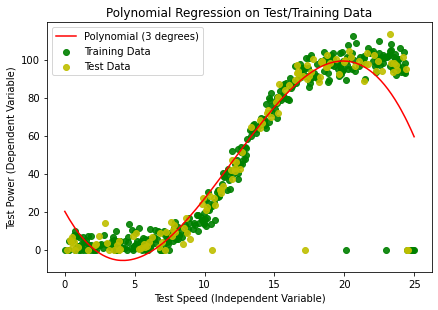

In [160]:
# Plot test data and training data on scatterplots
plt.scatter(x_train, y_train, color='g', label="Training Data", alpha=0.9)
plt.scatter(x_test, y_test, color='y', label="Test Data", alpha=0.9)

# Plot zipped data for regression line and format with labels, legend
# and title
plt.plot(x_train, y_poly_pred, color='r', label="Polynomial (3 degrees)")

plt.legend()
plt.tight_layout()
plt.title("Polynomial Regression on Test/Training Data")
plt.xlabel("Test Speed (Independent Variable)")
plt.ylabel("Test Power (Dependent Variable)")
plt.show()

### Results of Sklearn Polynomial Regression Model

#### Coefficient

There are 3 Coefficients of this model as it is a Polynomial of the 3rd degree, they are: -13.33, 1.94, -0.05.

In [161]:
# Print Model coefficient
coefficient_4 = model_2.coef_
print(coefficient_4)

[[  0.         -13.33262227   1.93710856  -0.05363941]]


#### R² of PolynomialFeatures() Method

The R² of this model is 88%.

In [162]:
print(model_2.score(x_poly, y_train))

0.8807981988554527


***

### Advanced Results of Sklearn Polynomial Regression Model

As we have used Sklearn to split our data and carry out Simple Linear Regression using a model, we can access extra statistics on our dataset.

Below is a bloack of code that calls on the statsmodels.api() method to produce data including Std.Err, t-values and other datapoints.

In [163]:
# Load in test x array as U and load in first vector (0)
# Create an empty list for y to be populated later
U = x_train
U_0 = 0
y = []

# Create a for loop with .append() to append the logarithm of each element 
# of x_train divided by 0, Eulers number, to y
for number in U:
    y.append(math.log(number/U_0, math.e))

# Set y to y_test
y = y_train

 # Set t to y_oly_pred and add a constant
t = y_poly_pred
t = sm.add_constant(t, prepend=False)

# Set model to the statsmodelapi summary, factoring in y and t as parameters
model = sm.OLS(y,t)
result = model.fit()
# Create result variable and set to model.fit and then call the summary() 
result.summary()

<ipython-input-163-8b4c250f34c0>:10: RuntimeWarning: invalid value encountered in true_divide
  y.append(math.log(number/U_0, math.e))
<ipython-input-163-8b4c250f34c0>:10: RuntimeWarning: divide by zero encountered in true_divide
  y.append(math.log(number/U_0, math.e))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     2756.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          2.34e-174
Time:                        23:12:43   Log-Likelihood:                -1531.6
No. Observations:                 375   AIC:                             3067.
Df Residuals:                     373   BIC:                             3075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000      0.019     52.499      0.000       0.963       1.037
const      -1.545e-11      1.172  -1.32e-11      1.000      -2.305       2.305
==============================================================================
Omnibus:                      273.614   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3982.361
Skew:                          -2.955   Prob(JB):                         0.00
Kurtosis:                      17.831   Cond. No.                         96.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Note: The statistics of note below all relate to the x1 values, the constant values are being ignored in this model.

#### Std. Err.

As seen above the Standard Error of the coefficient is **0.019**. This indicates that the Sklearn's PolynomialRegression() is a better fit than LinearRegression(), what was higher at 0.055. 

#### t-value (t)

The t-value is x1 is **52.499**. As a high t-value is desirible, this is an improvement. Polynomial regression has produced a t-level that is more than 33 points higher than the Sklearn linear model.


#### p-value

The p-value is 0.

<br>

***

# 5. Table of Results 

|  | Data Used |Coef. |R²| Std.Err.*(x1)* | p-value*(x1)*  | t-value*(x1)*    | H0 Rejected |    | 
| :---| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **Simple Linear Regression**   |   |    |    |    |    |   |    |      |
|  *polyfit() Method* |Full Data | [4.917, -13.899] | 72.9%| ✘| ✘|✘ |✘  | 
| *Sklearn Model*  | Train/Test | 4.866 |   74.6% |0.055  |0.00 |19.128| ✔| 
|  | |    |    |   |   |    |    |   |  
|  **Polynomial Regression**   |    |    |    |   |   |    |    |   |  
| *curve_fit() Method*  | Full Data	   |[-0.0, 0.367. -6.771]  |91.1% |✘   |✘   | ✘   | ✘| 
| *Sklearn Model* |  Train Test | [-13.332,   1.937,  -0.053] | 88.1% | 0.019  | 0.00  |52.499   | ✔| 

***